# Exploração de carcterísticas

In [1]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

ROOT_PATH = os.environ.get("ROOT_PATH")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_parquet(f"{ROOT_PATH}/features/features.parquet")


In [4]:
df = df.astype({
    'var': float,
    'skew': float,
    'kur': float,
    'label': str
})


## Agrupamento Geral

Text(0.5, 0, '')

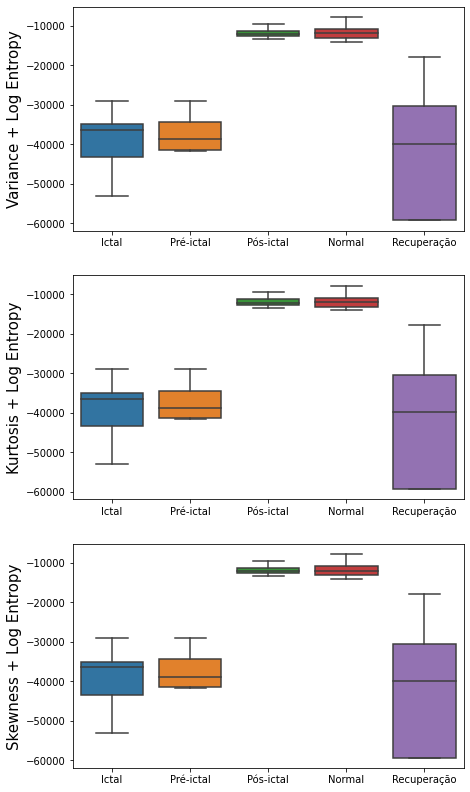

In [22]:
fig = plt.figure(figsize=(7, 14))

gs = GridSpec(nrows=3, ncols=1)

# Boxplots
ax0 = fig.add_subplot(gs[0])
g1 = sns.boxplot(data=df, x='label',y='var',ax=ax0, showfliers=False)
g1.set(xticklabels=['Ictal','Pré-ictal','Pós-ictal','Normal','Recuperação'])
g1.set_ylabel('Variance + Log Entropy', size=15)
g1.set_xlabel('')

ax1 = fig.add_subplot(gs[1])
g2 = sns.boxplot(data=df, x='label',y='kur',ax=ax1, showfliers=False)
g2.set(xticklabels=['Ictal','Pré-ictal','Pós-ictal','Normal','Recuperação'])
g2.set_ylabel('Kurtosis + Log Entropy', size=15)
g2.set_xlabel('')


ax2 = fig.add_subplot(gs[2])
g3 = sns.boxplot(data=df, x='label',y='skew',ax=ax2, showfliers=False)
g3.set(xticklabels=['Ictal','Pré-ictal','Pós-ictal','Normal','Recuperação'])
g3.set_ylabel('Skewness + Log Entropy', size=15)
g3.set_xlabel('')


## Ampliando Grupos

In [7]:
df1 = df[df['label'].isin(['normal','rep'])]
df2 = df[df['label'].isin(['pre','pos'])]
df3 = df[df['label']=='ictal']

df1['type'] = np.repeat('normal_rep', len(df1))
df2['type'] = np.repeat('pre_pos', len(df2))
df3['type'] = np.repeat('ictal', len(df3))


df = pd.concat([df1,df2,df3])

/tmp/ipykernel_2990/3267597238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = np.repeat('normal_rep', len(df1))
/tmp/ipykernel_2990/3267597238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type'] = np.repeat('pre_pos', len(df2))
/tmp/ipykernel_2990/3267597238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

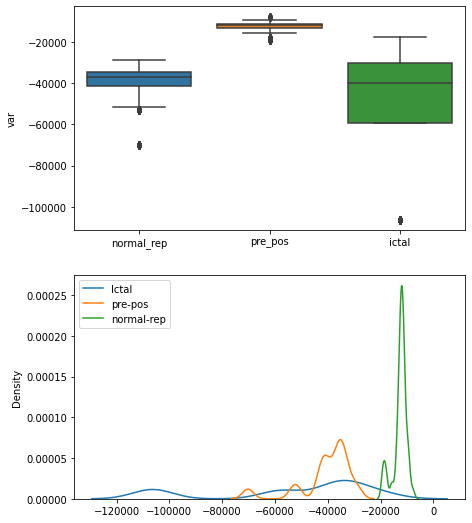

In [17]:
fig = plt.figure(figsize=(7, 14))

gs = GridSpec(nrows=3, ncols=1)

# Boxplots
ax0 = fig.add_subplot(gs[0])
g1 = sns.boxplot(data=df, x='type',y='var',ax=ax0)
g1.set_xlabel('')


ax1 = fig.add_subplot(gs[1])
sns.kdeplot(df[df['type']=='ictal']['var'].to_numpy(),label='Ictal', ax=ax1)
sns.kdeplot(df[df['type']== 'normal_rep']['var'].to_numpy(), label='pre-pos', ax=ax1)
sns.kdeplot(df[df['type']== 'pre_pos']['var'].to_numpy(), label='normal-rep', ax=ax1)
ax1.legend()